In [1]:
import pandas as pd 
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [1]:
pip show numpy

Name: numpy
Version: 2.2.6
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are
 met:

     * Redistributions of source code must retain the above copyright
        notice, this list of conditions and the following disclaimer.

     * Redistributions in binary form must reproduce the above
        copyright notice, this list of conditions and the following
        disclaimer in the documentation and/or other materials provided
        with the distribution.

     * Neither the name of the NumPy Developers nor the names of any
        contributors may be used to endorse or promote products derived
        from this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED

In [2]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['smoking_history'] = encode.fit_transform(df['smoking_history'])
df['gender'] = encode.fit_transform(df['gender'])

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.describe().T
# from this we will comapre mean and 50% if we get change of 10% b/w them then we say there may be outlier present

,count,mean,std,min,25%,50%,75%,max
gender,100000.0,0.414660,0.493031,0.00,0.00,0.00,1.00,2.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
smoking_history,100000.0,2.179650,1.889659,0.00,0.00,3.00,4.00,5.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


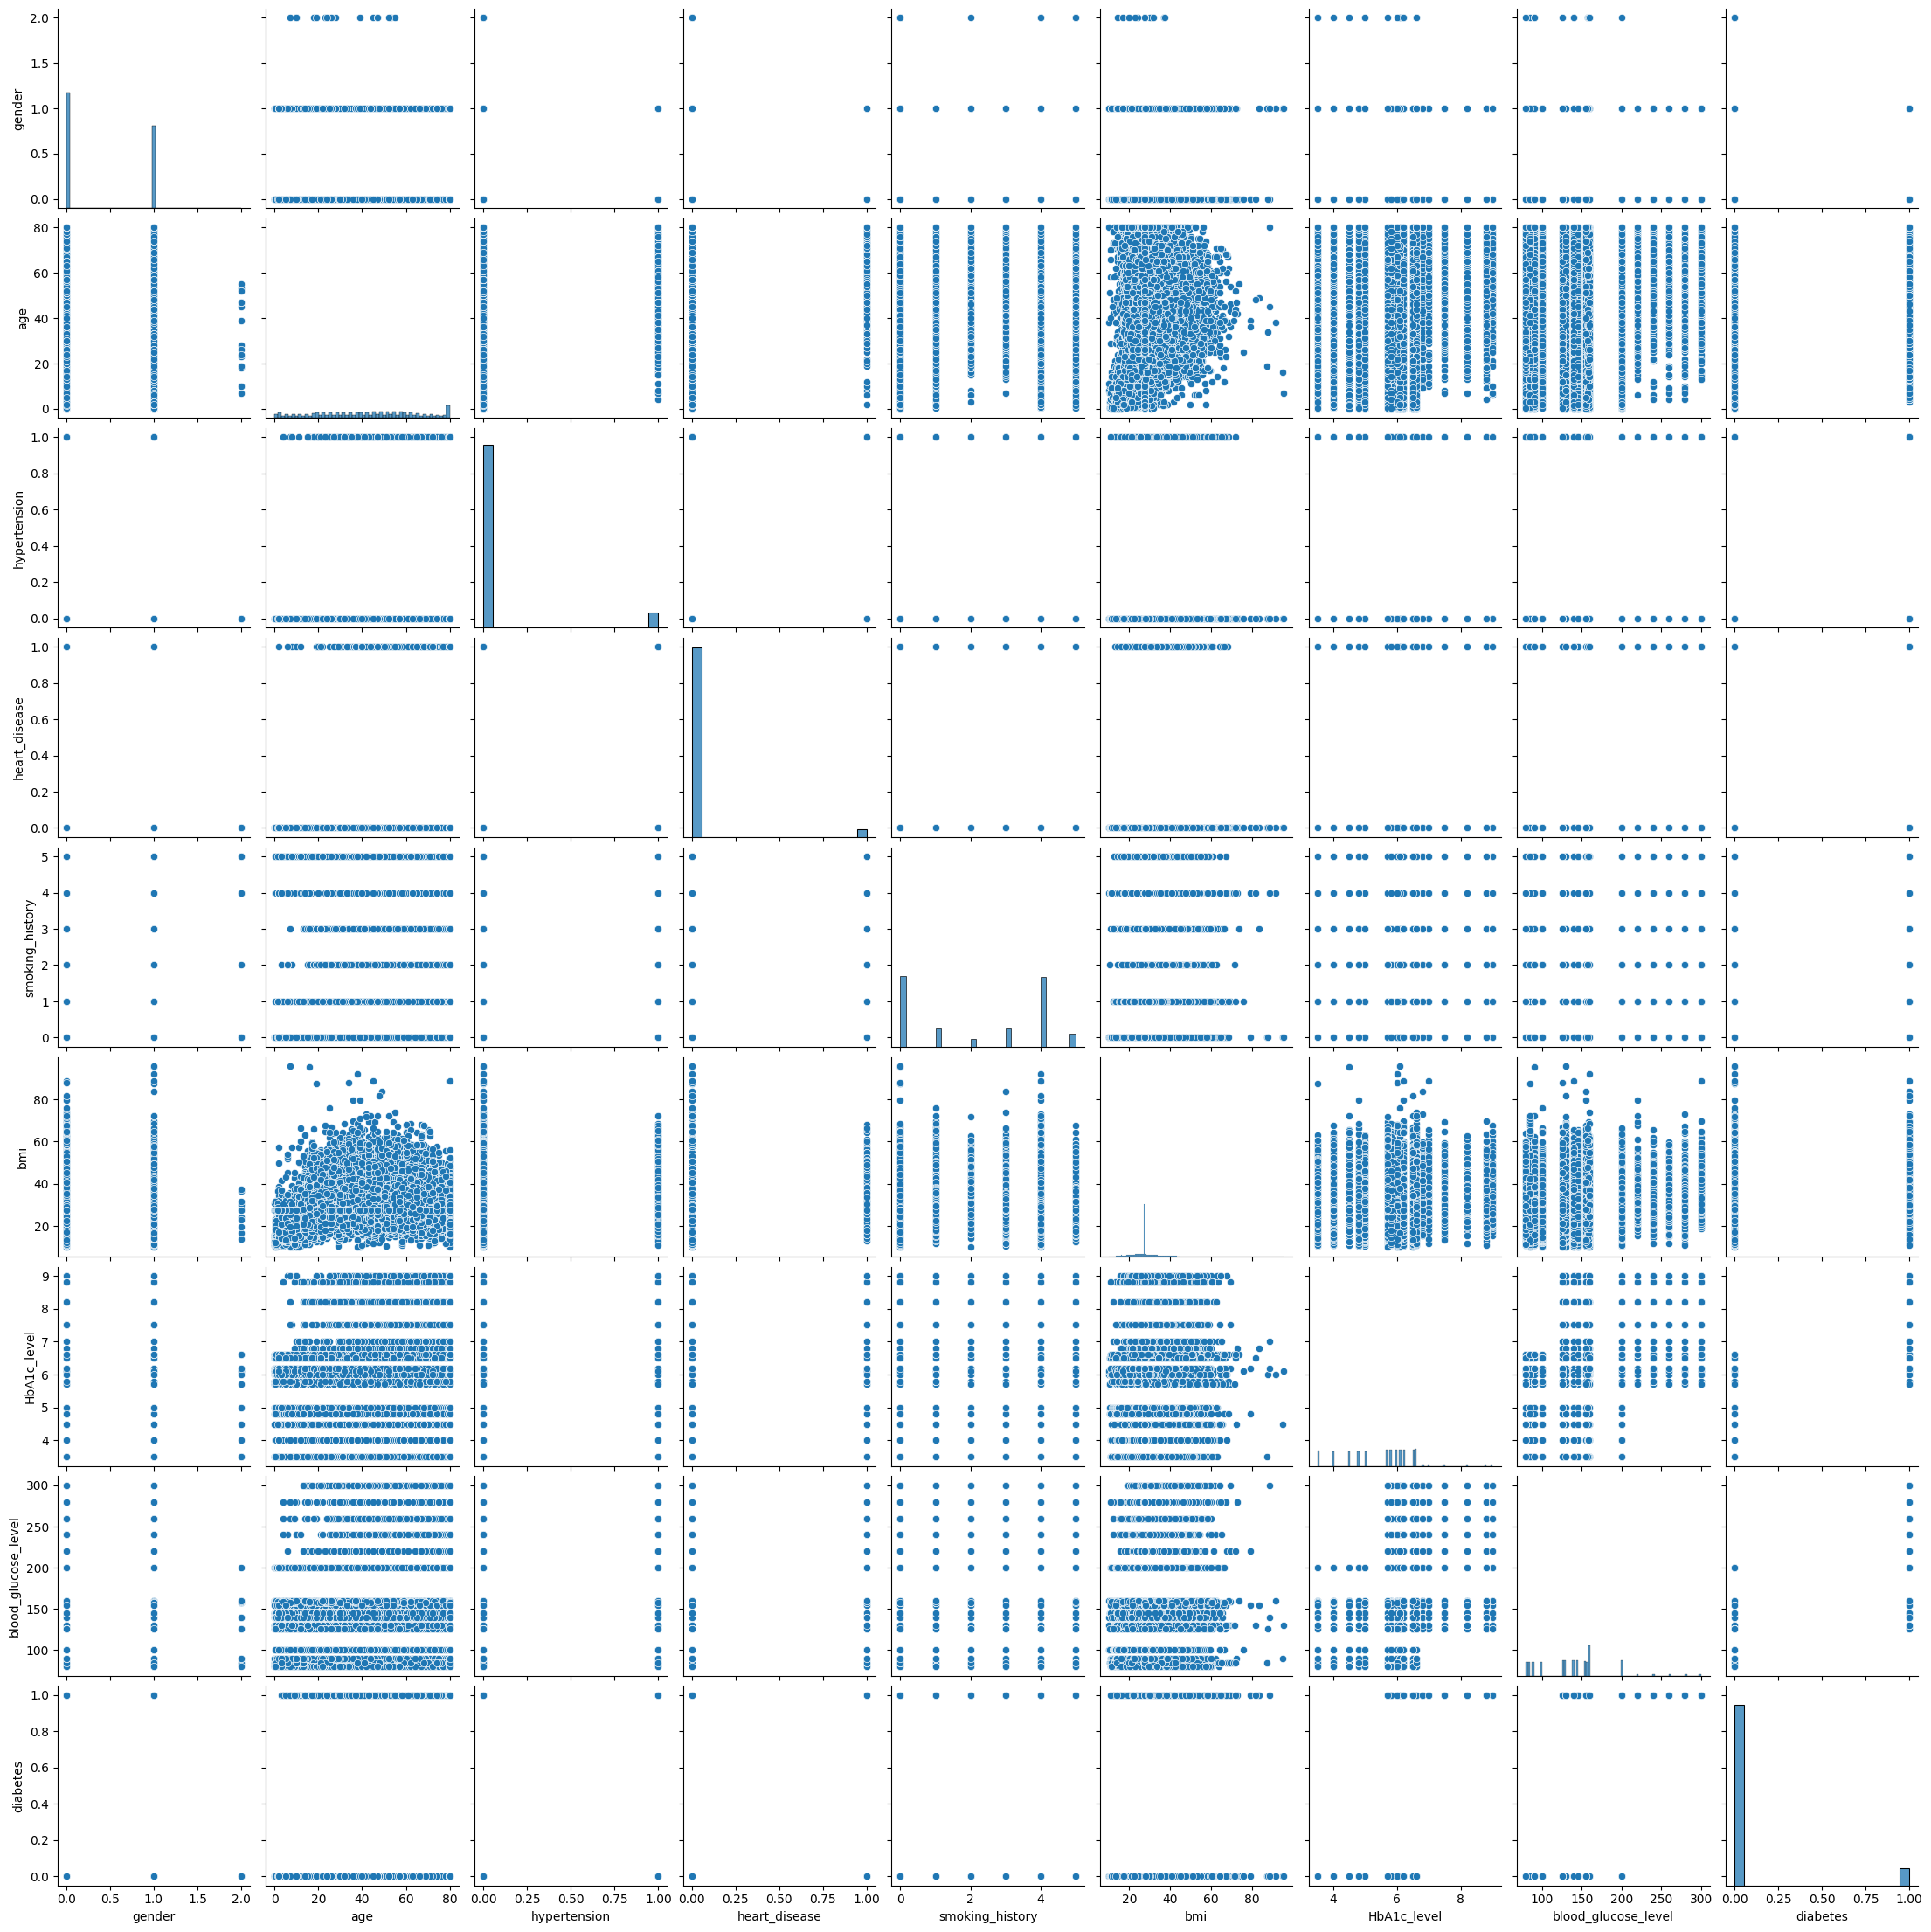

In [9]:
import seaborn as sns
sns.pairplot(data = df)

In [10]:
# df['hypertension'].unique()
hypertension_count = df[df['hypertension'] == 1].shape[0]
hypertension_count


7485

In [11]:
# df['diabetes'].unique()
diabetes_cnt = df[df['diabetes'] == 1].shape[0]
diabetes_cnt

8500

In [12]:
heart_cnt = df[df['heart_disease'] == 1].shape[0]
heart_cnt

3942

In [13]:
# num = df.select_dtypes(include='number')
corr = df.corr()
corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<Axes: >

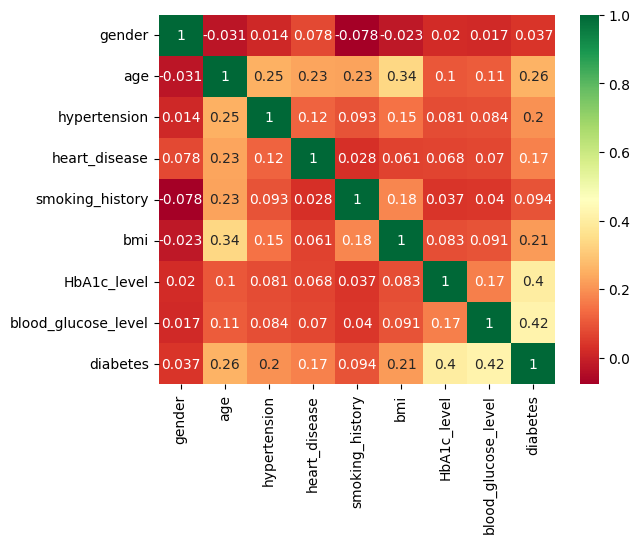

In [14]:
sns.heatmap(corr, cmap='RdYlGn', annot = True)

In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [16]:
# Function to apply IQR filtering
def remove_outliers_iqr(data):
    # Select only numeric columns
    numeric_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only rows within bounds
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
 
# Apply IQR removal
df = remove_outliers_iqr(df)
 
# Preview result
df.shape

(90387, 9)

In [17]:
# Skewness measures symmetry — values close to 0 imply your data is fairly symmetric
skew = df.skew()
print(skew)
# Kurtosis measures "tailedness" — values near 0 (especially excess kurtosis) suggest it’s not too peaked
# or flat compared to normal.
kurt = df.kurt()
print(kurt)

#if i am getting skew or kurtosis not in b/w -3 to 3 then 

gender                 0.333221
age                   -0.004912
hypertension           3.507524
heart_disease          5.010815
smoking_history       -0.006604
bmi                   -0.117959
HbA1c_level           -0.481573
blood_glucose_level    0.099135
diabetes               4.142613
dtype: float64
gender                 -1.876376
age                    -1.017349
hypertension           10.302953
heart_disease          23.108782
smoking_history        -1.735845
bmi                     0.035530
HbA1c_level            -0.673403
blood_glucose_level    -0.476136
diabetes               15.161581
dtype: float64


In [18]:
corr = df.corr()
corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.033002,0.016549,0.078209,-0.076455,0.021201,0.014384,0.008798,0.035951
age,-0.033002,1.000000,0.248875,0.229139,0.217761,0.387896,0.051066,0.047223,0.207985
hypertension,0.016549,0.248875,1.000000,0.122334,0.084004,0.130185,0.042291,0.037560,0.161286
heart_disease,0.078209,0.229139,0.122334,1.000000,0.023657,0.065943,0.036012,0.028428,0.145763
smoking_history,-0.076455,0.217761,0.084004,0.023657,1.000000,0.168126,0.020363,0.017736,0.071482
bmi,0.021201,0.387896,0.130185,0.065943,0.168126,1.000000,0.036960,0.032353,0.140212
HbA1c_level,0.014384,0.051066,0.042291,0.036012,0.020363,0.036960,1.000000,0.054360,0.258190
blood_glucose_level,0.008798,0.047223,0.037560,0.028428,0.017736,0.032353,0.054360,1.000000,0.212464
diabetes,0.035951,0.207985,0.161286,0.145763,0.071482,0.140212,0.258190,0.212464,1.000000


In [19]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

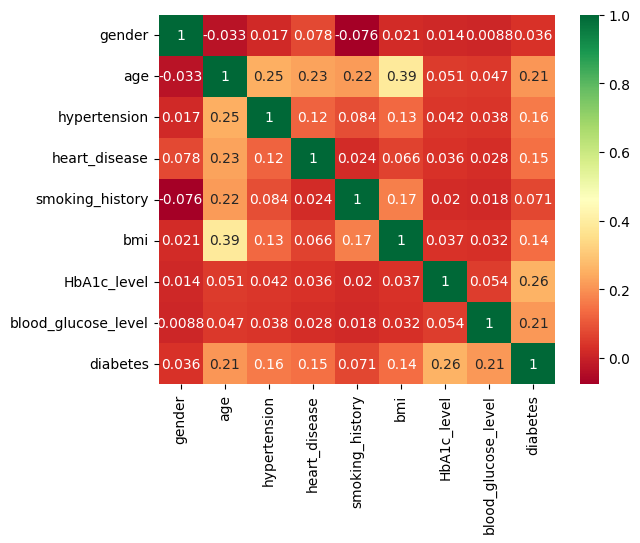

In [20]:
sns.heatmap(corr, cmap='RdYlGn', annot = True)

In [21]:
# why we do scaling - so that we see the zoomed data. 
# we can't apply scaling in hypertension, heat_disease, diabetes because it contains only two categorical value 0 and 1 then by doing scaling it generate 0.5 which is not present so here we not need to do any scaling 

In [22]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

### implementation of classification algorithms

In [23]:
x = df.drop('diabetes', axis = 1)

In [24]:
y = df['diabetes']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_train = dtree.predict(x_train)
y_pred_test = dtree.predict(x_test)

# Precision, Recall, and F1 for train data
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')
f1_train = f1_score(y_train, y_pred_train, average='binary')

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)

Train Precision: 0.9997154240182129
Train Recall: 0.9837580509661159
Train F1-score: 0.9916725476358504
Test Precision: 0.5759219088937093
Test Recall: 0.5746753246753247
Test F1-score: 0.5752979414951246


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print("confusion matrix\n",confusion_matrix(y_test, y_pred_test))
print("confusion matrix\n",confusion_matrix(y_train, y_pred_train))
print("classification_report\n", classification_report(y_test, y_pred_test))

confusion matrix
 [[16763   391]
 [  393   531]]
confusion matrix
 [[68737     1]
 [   58  3513]]
classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17154
           1       0.58      0.57      0.58       924

    accuracy                           0.96     18078
   macro avg       0.78      0.78      0.78     18078
weighted avg       0.96      0.96      0.96     18078



In [35]:
from sklearn.metrics import accuracy_score

# Predictions
# y_pred_train = dtree.predict(x_train)
# y_pred_test = dtree.predict(x_test)

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9991840573096018
Test Accuracy: 0.956632370837482


In [36]:
from sklearn.metrics import confusion_matrix
# y_pred_train = dtree.predict(x_train)
# y_pred_test = dtree.predict(x_test)
cm = confusion_matrix(y_train, y_pred_train)
tn = cm[0,0]
fp = cm[0,1]
specificity = tn/(tn+fp)
print("specificity: ", specificity)

specificity:  0.9999854520061684


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Precision, Recall, and F1 for train data
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')
f1_train = f1_score(y_train, y_pred_train, average='binary')

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)

Train Precision: 0.9991470002843332
Train Recall: 0.9840380845701484
Train F1-score: 0.9915349887133182
Test Precision: 0.9317269076305221
Test Recall: 0.5021645021645021
Test F1-score: 0.6526019690576652


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9991702277724764
Test Accuracy: 0.9726739683593317


In [39]:
from sklearn.metrics import confusion_matrix
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
cm = confusion_matrix(y_train, y_pred_train)
tn = cm[0,0]
fp = cm[0,1]
specificity = tn/(tn+fp)
print("specificity: ", specificity)

specificity:  0.9999563560185051


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import r2_score

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# SVC model
svc_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.
svc_model.fit( x_train, y_train)

# Predict and calculate accuracy
y_pred_train = svc_model.predict(x_train)
y_pred_test = svc_model.predict(x_test)

# Precision, Recall, and F1 for train data
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')
f1_train = f1_score(y_train, y_pred_train, average='binary')

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)

Train Precision: 0.9574468085106383
Train Recall: 0.2520302436292355
Train F1-score: 0.3990246065174019
Test Precision: 0.976
Test Recall: 0.26406926406926406
Test F1-score: 0.41567291311754684


In [41]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_train = svc_model.predict(x_train)
y_pred_test = svc_model.predict(x_test)

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9625081248530611
Test Accuracy: 0.9620533244827968


In [42]:
from sklearn.metrics import confusion_matrix
y_pred_train = svc_model.predict(x_train)
y_pred_test = svc_model.predict(x_test)
cm = confusion_matrix(y_train, y_pred_train)
tn = cm[0,0]
fp = cm[0,1]
specificity = tn/(tn+fp)
print("specificity: ", specificity)

specificity:  0.999418080246734


In [43]:
# work on confusion matrix
# logistic regression

In [44]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Precision, Recall, and F1 for train data
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)

Train Precision: 0.7787406123627961
Train Recall: 0.3774852982357883
Train F1-score: 0.5084873632591475
Test Precision: 0.7707865168539326
Test Recall: 0.3712121212121212
Test F1-score: 0.5010956902848794


In [45]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9639602262512273
Test Accuracy: 0.9622192720433677


In [46]:
from sklearn.metrics import confusion_matrix
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
cm = confusion_matrix(y_train, y_pred_train)
tn = cm[0,0]
fp = cm[0,1]
specificity = tn/(tn+fp)
print("specificity: ", specificity)

specificity:  0.9944281183624778


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [50]:
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)

Train Precision: 0.9461374911410347
Train Recall: 0.373844861383366
Train F1-score: 0.5359293456443196
Test Precision: 0.9014492753623189
Test Recall: 0.3365800865800866
Test F1-score: 0.49014972419227737


In [51]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9680261101660927
Test Accuracy: 0.964210642770218


In [52]:
from sklearn.metrics import confusion_matrix
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)
cm = confusion_matrix(y_train, y_pred_train)
tn = cm[0,0]
fp = cm[0,1]
specificity = tn/(tn+fp)
print("specificity: ", specificity)

specificity:  0.9988943524687945


In [53]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [54]:
y_pred_train = model_GNB.predict(x_train)
y_pred_test = model_GNB.predict(x_test)

In [55]:
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)

Train Precision: 0.24636469998328597
Train Recall: 0.41276953234388125
Train F1-score: 0.30856185890726395
Test Precision: 0.2516869095816464
Test Recall: 0.4036796536796537
Test F1-score: 0.3100581878636742


In [56]:
y_pred_train = model_GNB.predict(x_train)
y_pred_test = model_GNB.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9086420777496578
Test Accuracy: 0.908175683150791


In [57]:
from sklearn.metrics import confusion_matrix
y_pred_train = model_GNB.predict(x_train)
y_pred_test = model_GNB.predict(x_test)
cm = confusion_matrix(y_train, y_pred_train)
cm1 = confusion_matrix(y_test, y_pred_test)
tn = cm[1,1]
fp = cm[1,0]
specificity = tn/(tn+fp)
tn1 = cm1[1,1]
fp1 = cm1[1,0]
specificity1 = tn1/(tn1+fp1)
print("specificity for train: ",specificity)
print("specificity for test: ",specificity1)


specificity for train:  0.41276953234388125
specificity for test:  0.4036796536796537


In [58]:
df.shape

(90387, 9)

### boosting algorithms 

### AdaBoost Algorithm

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
accuracy_score_test = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_train, y_pred_train)
cm1 = confusion_matrix(y_test, y_pred_test)

tn = cm[1,1]
fp = cm[1,0]
tn1 = cm1[1,1]
fp1 = cm1[1,0]

specificity = tn/(tn+fp)
specificity1 = tn1/(tn1+fp1)

print("precision for training: ", precision_train)
print("precision for test: ", precision_test)
print("recall score for training", recall_train)
print("recall score for test", recall_test)
print("f1 score for training: ", f1_score_train)
print("f1 score for test: ", f1_score_test)
print("accuracy score for training: ", accuracy_score_train)
print("accuracy score for test: ", accuracy_score_test)
print("specificity for training: ", specificity)
print("specificity for test: ", specificity1)

precision for training:  1.0
precision for test:  1.0
recall score for training 0.47913749649957993
recall score for test 0.4805194805194805
f1 score for training:  0.647860658841348
f1 score for test:  0.6491228070175439
accuracy score for training:  0.9742770609467701
accuracy score for test:  0.9734483903086625
specificity for training:  0.47913749649957993
specificity for test:  0.4805194805194805


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
cat = CatBoostClassifier()
cat.fit(x_train, y_train)
y_pred_train = cat.predict(x_train)
y_pred_test = cat.predict(x_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
accuracy_score_test = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_train, y_pred_train)
cm1 = confusion_matrix(y_test, y_pred_test)

tn = cm[1,1]
fp = cm[1,0]
tn1 = cm1[1,1]
fp1 = cm1[1,0]

specificity = tn/(tn+fp)
specificity1 = tn1/(tn1+fp1)

print("precision for training: ", precision_train) # tp/tp+fp
print("precision for test: ", precision_test)
print("recall score for training", recall_train) # true positives/tp+fn
print("recall score for test", recall_test)
print("f1 score for training: ", f1_score_train) # harmonic mean of precision and recall 
print("f1 score for test: ", f1_score_test)
print("accuracy score for training: ", accuracy_score_train) # corrected predicted/total predicted -> tp+tn/tp+tn+fp+fn
print("accuracy score for test: ", accuracy_score_test)
print("specificity for training: ", specificity) # tn/tn+fp
print("specificity for test: ", specificity1)



Learning rate set to 0.064093
0:	learn: 0.5845679	total: 218ms	remaining: 3m 38s
1:	learn: 0.4898920	total: 248ms	remaining: 2m 3s
2:	learn: 0.3944972	total: 287ms	remaining: 1m 35s
3:	learn: 0.3372889	total: 319ms	remaining: 1m 19s
4:	learn: 0.2825969	total: 339ms	remaining: 1m 7s
5:	learn: 0.2391093	total: 356ms	remaining: 59s
6:	learn: 0.2132858	total: 371ms	remaining: 52.6s
7:	learn: 0.1906815	total: 385ms	remaining: 47.8s
8:	learn: 0.1619136	total: 402ms	remaining: 44.3s
9:	learn: 0.1426309	total: 418ms	remaining: 41.4s
10:	learn: 0.1292523	total: 434ms	remaining: 39.1s
11:	learn: 0.1193383	total: 453ms	remaining: 37.3s
12:	learn: 0.1117090	total: 470ms	remaining: 35.7s
13:	learn: 0.1073369	total: 487ms	remaining: 34.3s
14:	learn: 0.1023563	total: 503ms	remaining: 33s
15:	learn: 0.0993671	total: 518ms	remaining: 31.9s
16:	learn: 0.0966590	total: 534ms	remaining: 30.9s
17:	learn: 0.0941061	total: 547ms	remaining: 29.8s
18:	learn: 0.0918328	total: 563ms	remaining: 29.1s
19:	learn: 0

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
accuracy_score_test = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_train, y_pred_train)
cm1 = confusion_matrix(y_test, y_pred_test)

tn = cm[1,1]
fp = cm[1,0]
tn1 = cm1[1,1]
fp1 = cm1[1,0]

specificity = tn/(tn+fp)
specificity1 = tn1/(tn1+fp1)

print("precision for training: ", precision_train)
print("precision for test: ", precision_test)
print("recall score for training", recall_train)
print("recall score for test", recall_test)
print("f1 score for training: ", f1_score_train)
print("f1 score for test: ", f1_score_test)
print("accuracy score for training: ", accuracy_score_train)
print("accuracy score for test: ", accuracy_score_test)
print("specificity for training: ", specificity)
print("specificity for test: ", specificity1)

precision for training:  0.9887514060742407
precision for test:  0.9933920704845814
recall score for training 0.4922990758891067
recall score for test 0.4880952380952381
f1 score for training:  0.6573191250701066
f1 score for test:  0.6545718432510885
accuracy score for training:  0.9746504584491557
accuracy score for test:  0.9736696537227569
specificity for training:  0.4922990758891067
specificity for test:  0.4880952380952381


In [62]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)
y_pred_train = xg.predict(x_train)
y_pred_test = xg.predict(x_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
accuracy_score_test = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_train, y_pred_train)
cm1 = confusion_matrix(y_test, y_pred_test)

tn = cm[1,1]
fp = cm[1,0]
tn1 = cm1[1,1]
fp1 = cm1[1,0]

specificity = tn/(tn+fp)
specificity1 = tn1/(tn1+fp1)

print("precision for training: ", precision_train)
print("precision for test: ", precision_test)
print("recall score for training", recall_train)
print("recall score for test", recall_test)
print("f1 score for training: ", f1_score_train)
print("f1 score for test: ", f1_score_test)
print("accuracy score for training: ", accuracy_score_train)
print("accuracy score for test: ", accuracy_score_test)
print("specificity for training: ", specificity)
print("specificity for test: ", specificity1)



precision for training:  0.983433734939759
precision for test:  0.9503105590062112
recall score for training 0.5485858302996359
recall score for test 0.4967532467532468
f1 score for training:  0.704296243034334
f1 score for test:  0.652452025586354
accuracy score for training:  0.9772504114287295
accuracy score for test:  0.9729505476269499
specificity for training:  0.5485858302996359
specificity for test:  0.4967532467532468


In [64]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
lgb1 = lgb.LGBMClassifier()
lgb1.fit(x_train, y_train)
y_pred_train = lgb1.predict(x_train)
y_pred_test = lgb1.predict(x_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
accuracy_score_test = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_train, y_pred_train)
cm1 = confusion_matrix(y_test, y_pred_test)

tn = cm[1,1]
fp = cm[1,0]
tn1 = cm1[1,1]
fp1 = cm1[1,0]

specificity = tn/(tn+fp)
specificity1 = tn1/(tn1+fp1)

print("precision for training: ", precision_train)
print("precision for test: ", precision_test)
print("recall score for training", recall_train)
print("recall score for test", recall_test)
print("f1 score for training: ", f1_score_train)
print("f1 score for test: ", f1_score_test)
print("accuracy score for training: ", accuracy_score_train)
print("accuracy score for test: ", accuracy_score_test)
print("specificity for training: ", specificity)
print("specificity for test: ", specificity1)



[LightGBM] [Info] Number of positive: 3571, number of negative: 68738
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 72309, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049385 -> initscore=-2.957457
[LightGBM] [Info] Start training from score -2.957457


C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


precision for training:  0.9898450026723677
precision for test:  0.9806451612903225
recall score for training 0.5186222346681602
recall score for test 0.4935064935064935
f1 score for training:  0.6806321205439176
f1 score for test:  0.6565874730021598
accuracy score for training:  0.975964264476068
accuracy score for test:  0.9736143378692333
specificity for training:  0.5186222346681602
specificity for test:  0.4935064935064935


### HyperParamter Tuning 

### Logistic Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

grid_train = accuracy_score(y_train, y_pred_train)
grid_test = accuracy_score(y_test, y_pred_test)

print(grid_train)
print(grid_test)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.9636559764344688
0.9629936939926983


In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
random_search = RandomizedSearchCV(LogisticRegression(), param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)
print(random_search.best_params_)

y_pred_train = random_search.predict(x_train)
y_pred_test = random_search.predict(x_test)

random_train = accuracy_score(y_train, y_pred_train)
random_test = accuracy_score(y_test, y_pred_test)

print(random_train)
print(random_test)

C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.9636836355087195
0.9626617988715566


### Decision Tree Classifier

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

grid_train = accuracy_score(y_train, y_pred_train)
grid_test = accuracy_score(y_test, y_pred_test)

print(grid_train)
print(grid_test)



{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
0.9636559764344688
0.9629936939926983


In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)
print(random_search.best_params_)

y_pred_train = random_search.predict(x_train)
y_pred_test = random_search.predict(x_test)

random_search_train = accuracy_score(y_train, y_pred_train)
random_search_test = accuracy_score(y_test, y_pred_test)

print(random_search_train)
print(random_search_test)


{'min_samples_split': 2, 'max_depth': 3, 'criterion': 'gini'}
0.9742217427982686
0.9745547073791349


### randomforest classifier 

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

grid_train = accuracy_score(y_train, y_pred_train)
grid_test = accuracy_score(y_test, y_pred_test)

print(grid_train)
print(grid_test)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9636559764344688
0.9629936939926983


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 30),
    'max_depth': randint(10, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)
print(random_search.best_params_)

y_pred_train = random_search.predict(x_train)
y_pred_test = random_search.predict(x_test)

random_search_train = accuracy_score(y_train, y_pred_train)
random_search_test = accuracy_score(y_test, y_pred_test)

print(random_search_train)
print(random_search_test)


{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 29}
0.974484504003651
0.9745547073791349


In [65]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [10, 100, 1000], 
			'gamma': [0.01, 0.001, 0.0001], 
			'kernel': ['rbf']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(x_train, y_train)
y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

grid_train = accuracy_score(y_train, y_pred_train)
grid_test = accuracy_score(y_test, y_pred_test)

print(grid_train)
print(grid_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.965 total time=  25.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.964 total time=  27.3s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.964 total time=  27.9s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.965 total time=  30.2s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.964 total time=  49.7s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.963 total time=  54.4s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.962 total time=  56.4s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.962 total time= 1.3min
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.963 total time=  45.9s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.962 total time=  50.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.958 total time=  52.7s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;,

In [ ]:
from scipy.stats import uniform

# Define the model
svc = SVC()

# Define the hyperparameter space
param_distributions = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'gamma': uniform(0.01, 1),  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel types
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
y_pred_train = random_search.predict(x_train)
y_pred_test = random_search.predict(x_test)

random_search_train = accuracy_score(y_train, y_pred_train)
random_search_test = accuracy_score(y_test, y_pred_test)

print(random_search_train)
print(random_search_test)

In [67]:
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
gb_pred = gb.predict(x_test)